In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Load Dataset

In [3]:
# Load the dataset
train_df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")

In [4]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
# Preview the data
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (1296675, 23)
Test shape: (555719, 23)


In [7]:
# Size of data
train_df.size

29823525

In [8]:
test_df.size

12781537

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [11]:
train_df.isnull().values.any()

False

In [12]:
test_df.isnull().values.any()

False

In [13]:
# Combine the dataset
combined_df = pd.concat([train_df, test_df], axis=0)

In [14]:
combined_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [15]:
combined_df.shape

(1852394, 23)

In [16]:
combined_df.size

42605062

In [17]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [18]:
combined_df.drop(labels = ['first','last','job','dob','trans_num','street','trans_date_trans_time','city','state'], axis=1, inplace=True)

In [19]:
combined_df.head()

,Unnamed: 0,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


# Data Visualization

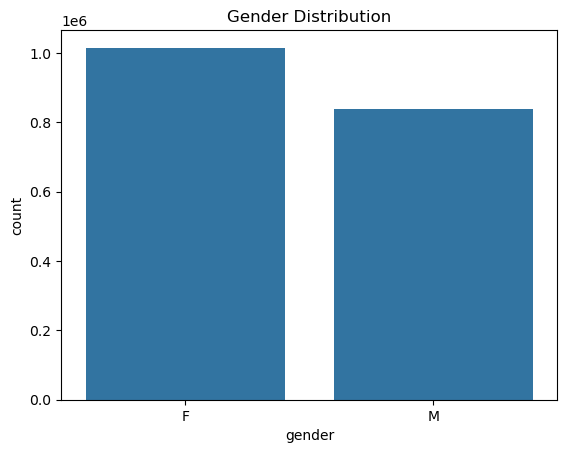

In [28]:
sns.countplot(x='gender', data=combined_df)
plt.title('Gender Distribution')
plt.show()

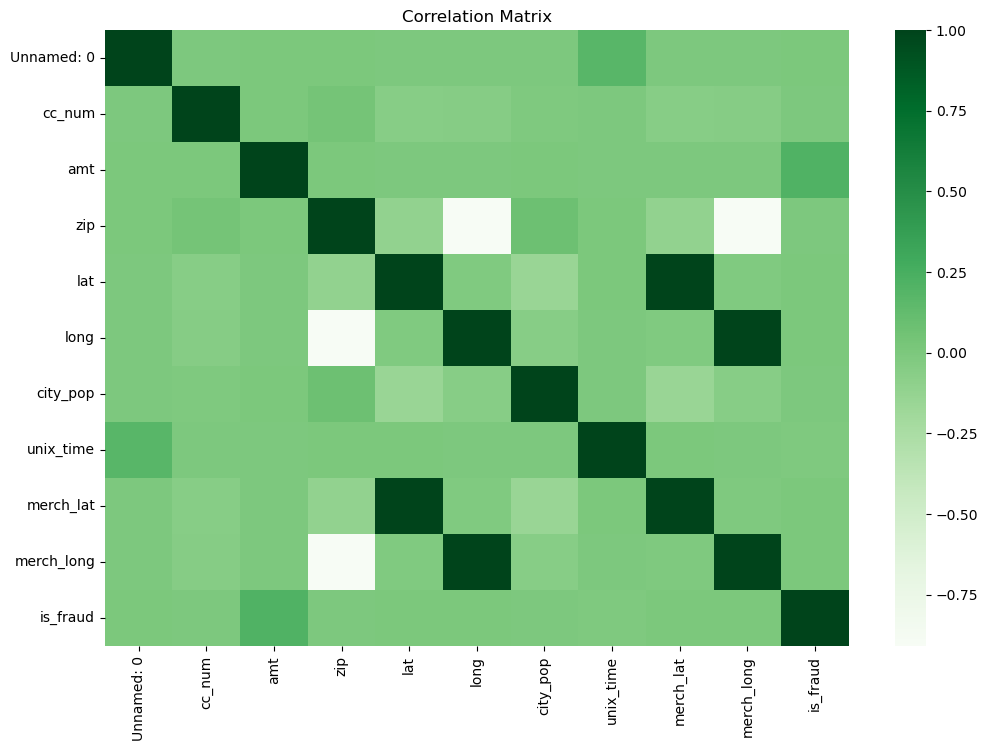

In [30]:
# Correlation Matrix
numeric_df = combined_df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='Greens', annot=False, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Preprocess the data

In [32]:
encoder = LabelEncoder()
new_col = encoder.fit_transform(combined_df['merchant'].values)
combined_df['merchant_new'] = new_col
combined_df.drop(labels=['merchant'], axis=1, inplace=True)

In [33]:
encoder = LabelEncoder()
new_col1 = encoder.fit_transform(combined_df['category'].values)
combined_df['category_new'] = new_col1
combined_df.drop(labels=['category'], axis=1, inplace=True)

In [34]:
combined_df = pd.get_dummies(combined_df)
combined_df.drop(labels=['gender_F'], axis=1, inplace=True)

In [36]:
combined_df.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merchant_new,category_new,gender_M
0,0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,514,8,False
1,1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,241,4,False
2,2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,390,0,True
3,3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,360,2,True
4,4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,297,9,True


# Split and Train the data

In [38]:
X = combined_df.drop(labels=['is_fraud'], axis=1)
y = combined_df['is_fraud']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [42]:
# Train a Logistic Regression model
lr_model = LogisticRegression()

In [43]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [45]:
# Predict
lr_predictions = lr_model.predict(X_test)

In [46]:
# Evaluation
print("Logistic Regression Model:")
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))

Logistic Regression Model:


U:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
U:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

Accuracy:  0.9947284461467452


U:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


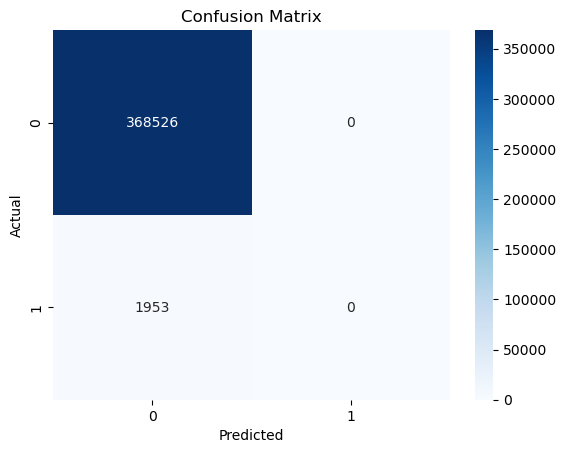

In [47]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Tree

In [49]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier()

In [50]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
# Predict
dt_predictions = dt_model.predict(X_test)

In [53]:
# Evaluation
print("Decision Tree Model:")
print(classification_report(y_test, dt_predictions))
print("Accuracy: ", accuracy_score(y_test, dt_predictions))

Decision Tree Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.64      0.66      0.65      1953

    accuracy                           1.00    370479
   macro avg       0.82      0.83      0.82    370479
weighted avg       1.00      1.00      1.00    370479

Accuracy:  0.99623190518221


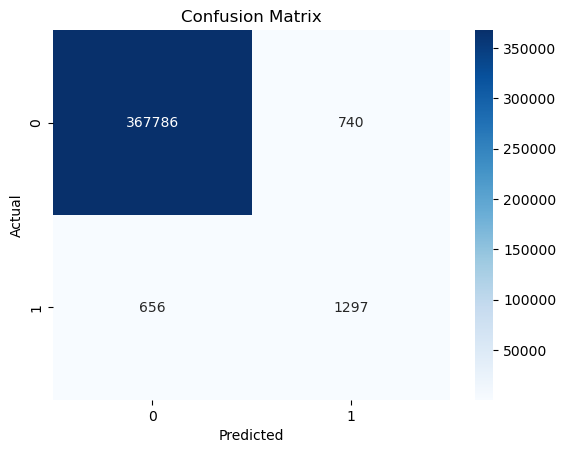

In [61]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Classifier

In [71]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

In [73]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [75]:
# Predict
rf_predictions = rf_model.predict(X_test)

In [77]:
# Evaluation
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))
print("Accuracy: ", accuracy_score(y_test, rf_predictions))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.88      0.64      0.74      1953

    accuracy                           1.00    370479
   macro avg       0.94      0.82      0.87    370479
weighted avg       1.00      1.00      1.00    370479

Accuracy:  0.9976381927180757


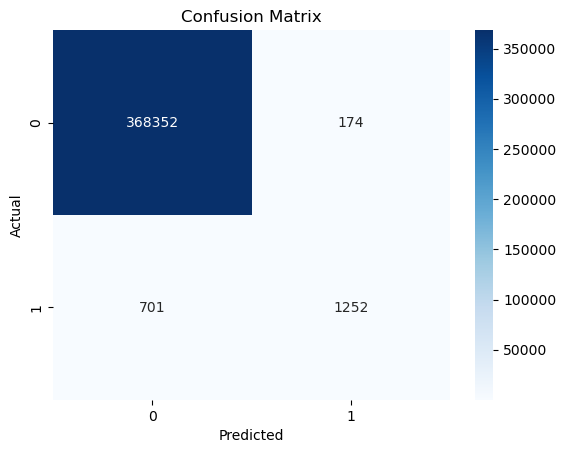

In [79]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()